In [5]:
data_image_path = '/kaggle/input/face-detection-dataset/images/val'
data_labels_path = '/kaggle/input/face-detection-dataset/labels/val'

In [11]:
import cv2
import random 
import os 
import matplotlib.pyplot as plt 

In [12]:
def visualize_image_with_labels(image_path, label_path):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Get image dimensions
    height, width, _ = image.shape
    
    # Read the label file and parse the labels
    labels = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f.readlines():
                class_id, x_center, y_center, box_width, box_height = map(float, line.split())
                # Convert YOLO format to pixel coordinates
                x_center_pixel = x_center * width
                y_center_pixel = y_center * height
                box_width_pixel = box_width * width
                box_height_pixel = box_height * height
                
                # Store label details
                labels.append({
                    "class_id": int(class_id),
                    "x_center": round(x_center_pixel, 2),
                    "y_center": round(y_center_pixel, 2),
                    "box_width": round(box_width_pixel, 2),
                    "box_height": round(box_height_pixel, 2)
                })
                
                # Calculate bounding box corners
                x1 = int(x_center_pixel - box_width_pixel / 2)
                y1 = int(y_center_pixel - box_height_pixel / 2)
                x2 = int(x_center_pixel + box_width_pixel / 2)
                y2 = int(y_center_pixel + box_height_pixel / 2)
                
                # Draw the rectangle
                cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(image, f'Class {int(class_id)}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
    
    # Display the image and the labels
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    
    # Add label details below the image
    if labels:
        label_text = "\n".join([f"Class {label['class_id']}: x_center={label['x_center']}, y_center={label['y_center']}, width={label['box_width']}, height={label['box_height']}" for label in labels])
    else:
        label_text = "No labels found."
    
    plt.title(label_text, fontsize=10)
    plt.show()

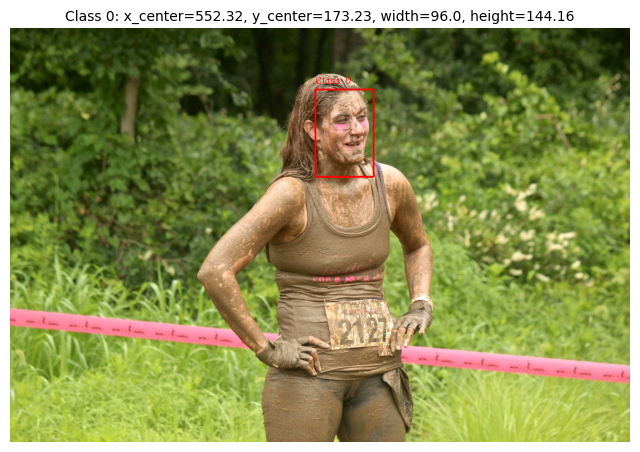

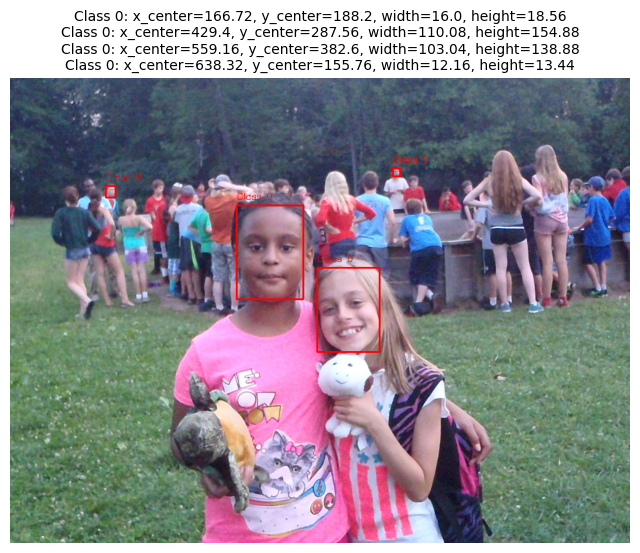

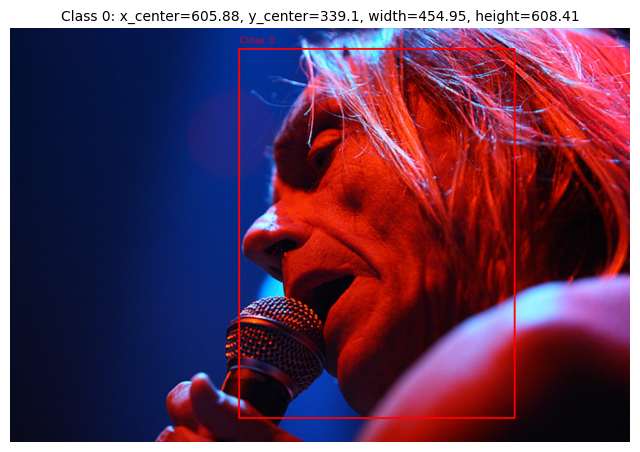

In [15]:
# Select a few random images to visualize
num_images_to_visualize = 3  # Number of images you want to visualize
image_files = [f for f in os.listdir(data_image_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
selected_images = random.sample(image_files, num_images_to_visualize)

# Visualize selected images
for image_file in selected_images:
    image_path = os.path.join(data_image_path, image_file)
    
    # Find corresponding label file
    label_file = os.path.splitext(image_file)[0] + '.txt'
    label_path = os.path.join(data_labels_path, label_file)
    
    # Visualize the image with labels
    visualize_image_with_labels(image_path, label_path)

# split the Data

In [16]:
import shutil 

# Chemins des répertoires de sortie
train_image_path = '/kaggle/working/dataset/images/train'
val_image_path = '/kaggle/working/dataset/images/val'
train_label_path = '/kaggle/working/dataset/labels/train'
val_label_path = '/kaggle/working/dataset/labels/val'

# Créer les répertoires si nécessaire
os.makedirs(train_image_path, exist_ok=True)
os.makedirs(val_image_path, exist_ok=True)
os.makedirs(train_label_path, exist_ok=True)
os.makedirs(val_label_path, exist_ok=True)


In [17]:
# Liste des fichiers d'images
image_files = [f for f in os.listdir(data_image_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Mélanger les fichiers pour garantir un bon échantillonnage
random.shuffle(image_files)

# Calculer les proportions
train_size = int(0.85 * len(image_files))  # 85% pour l'entraînement
train_files = image_files[:train_size]
val_files = image_files[train_size:]

In [18]:
# Fonction pour copier les fichiers (images et labels)
def copy_files(image_list, src_image_path, src_label_path, dest_image_path, dest_label_path):
    for image_file in image_list:
        # Chemin source de l'image
        src_image = os.path.join(src_image_path, image_file)
        # Chemin source du fichier label correspondant
        label_file = os.path.splitext(image_file)[0] + '.txt'
        src_label = os.path.join(src_label_path, label_file)

        # Chemin destination
        dest_image = os.path.join(dest_image_path, image_file)
        dest_label = os.path.join(dest_label_path, label_file)

        # Copier l'image
        shutil.copy(src_image, dest_image)
        # Copier le label si présent
        if os.path.exists(src_label):
            shutil.copy(src_label, dest_label)

In [19]:
# Copier les fichiers pour l'entraînement
copy_files(train_files, data_image_path, data_labels_path, train_image_path, train_label_path)

# Copier les fichiers pour la validation
copy_files(val_files, data_image_path, data_labels_path, val_image_path, val_label_path)

print(f"Train set: {len(train_files)} images")
print(f"Validation set: {len(val_files)} images")

Train set: 2844 images
Validation set: 503 images


In [30]:
data_yaml = {
    'dataset': '/kaggle/working/dataset',
    'train':'/kaggle/working/dataset/images/train',
    'train_labels':'/kaggle/working/dataset/labels/train',
    'val':'/kaggle/working/dataset/images/val',
    'val_labels':'/kaggle/working/dataset/labels/train',
    'names' : ['Human Face']
}

In [31]:
with open('data.yaml', 'w') as file:
    yaml.dump(data_yaml, file, default_flow_style=False)

In [32]:
with open('/kaggle/working/data.yaml', 'r') as file:
    loaded_config = yaml.safe_load(file)

In [26]:
!pip install ultralytics

In [33]:
from ultralytics import YOLO
import yaml

In [34]:
model = YOLO('yolov5s.pt')
model.train(data = '/kaggle/working/data.yaml', epochs=20)

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov5s.pt, data=/kaggle/working/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, so

100%|██████████| 755k/755k [00:00<00:00, 98.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      3520  ultralytics.nn.modules.conv.Conv             [3, 32, 6, 2, 2]              
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     18816  ultralytics.nn.modules.block.C3              [64, 64, 1]                   
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    115712  ultralytics.nn.modules.block.C3              [128, 128, 2]                 
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  3    625152  ultralytics.nn.modules.block.C3              [256, 256, 3]                 
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 280MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/dataset/labels/train... 2844 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2844/2844 [00:02<00:00, 1203.59it/s]

train: New cache created: /kaggle/working/dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/dataset/labels/val... 503 images, 0 backgrounds, 0 corrupt: 100%|██████████| 503/503 [00:00<00:00, 875.75it/s]


val: New cache created: /kaggle/working/dataset/labels/val.cache
Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.52G      1.473      1.323      1.286         68        640: 100%|██████████| 178/178 [00:51<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.36it/s]


                   all        503       1498      0.762      0.541      0.597      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.49G       1.45      1.046      1.216         63        640: 100%|██████████| 178/178 [00:50<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]

                   all        503       1498      0.819      0.633      0.717      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.48G      1.442      1.048      1.226         74        640: 100%|██████████| 178/178 [00:49<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.89it/s]

                   all        503       1498      0.838      0.626      0.712      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.48G      1.415     0.9956      1.202         77        640: 100%|██████████| 178/178 [00:49<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]


                   all        503       1498      0.832       0.64      0.719      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.47G      1.364     0.9248      1.181         91        640: 100%|██████████| 178/178 [00:49<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]

                   all        503       1498      0.862      0.634      0.733      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.48G      1.344     0.9062      1.173         48        640: 100%|██████████| 178/178 [00:49<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]

                   all        503       1498      0.842      0.688      0.764       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.47G      1.331     0.8716       1.15         55        640: 100%|██████████| 178/178 [00:49<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]

                   all        503       1498      0.838      0.692      0.764      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.48G      1.307     0.8312      1.144         83        640: 100%|██████████| 178/178 [00:49<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.89it/s]

                   all        503       1498      0.845      0.696      0.772      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.47G      1.292     0.8087      1.134         85        640: 100%|██████████| 178/178 [00:49<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]

                   all        503       1498      0.836      0.722      0.786      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.48G      1.265     0.7836      1.118         56        640: 100%|██████████| 178/178 [00:49<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]

                   all        503       1498       0.88        0.7      0.789       0.51


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.47G      1.261     0.7606      1.123         20        640: 100%|██████████| 178/178 [00:49<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.93it/s]

                   all        503       1498      0.843      0.719      0.795      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.48G      1.253     0.7378      1.116         36        640: 100%|██████████| 178/178 [00:49<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.87it/s]


                   all        503       1498       0.87       0.73      0.807      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.47G      1.231     0.7196      1.107         24        640: 100%|██████████| 178/178 [00:48<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]

                   all        503       1498      0.871      0.714      0.799      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.48G      1.213      0.698      1.102         30        640: 100%|██████████| 178/178 [00:48<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]

                   all        503       1498      0.865      0.733        0.8      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.47G      1.195     0.6677      1.087         29        640: 100%|██████████| 178/178 [00:48<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]

                   all        503       1498      0.855      0.756      0.819      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.48G      1.184     0.6511      1.086         40        640: 100%|██████████| 178/178 [00:48<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.63it/s]

                   all        503       1498      0.889       0.72      0.813      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.46G      1.171     0.6348      1.079         36        640: 100%|██████████| 178/178 [00:48<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]

                   all        503       1498      0.874      0.745      0.823      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.48G       1.15     0.6058      1.057         32        640: 100%|██████████| 178/178 [00:48<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]

                   all        503       1498      0.855      0.774      0.831       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.47G      1.135     0.5909      1.058         35        640: 100%|██████████| 178/178 [00:48<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.91it/s]

                   all        503       1498       0.87      0.764      0.837      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.48G      1.118     0.5752      1.052         48        640: 100%|██████████| 178/178 [00:48<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]

                   all        503       1498       0.87      0.768      0.839      0.557



20 epochs completed in 0.300 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 18.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 18.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv5s summary (fused): 193 layers, 9,111,923 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.40it/s]


                   all        503       1498       0.87      0.768      0.839      0.557
Speed: 0.1ms preprocess, 3.1ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fea64481ba0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

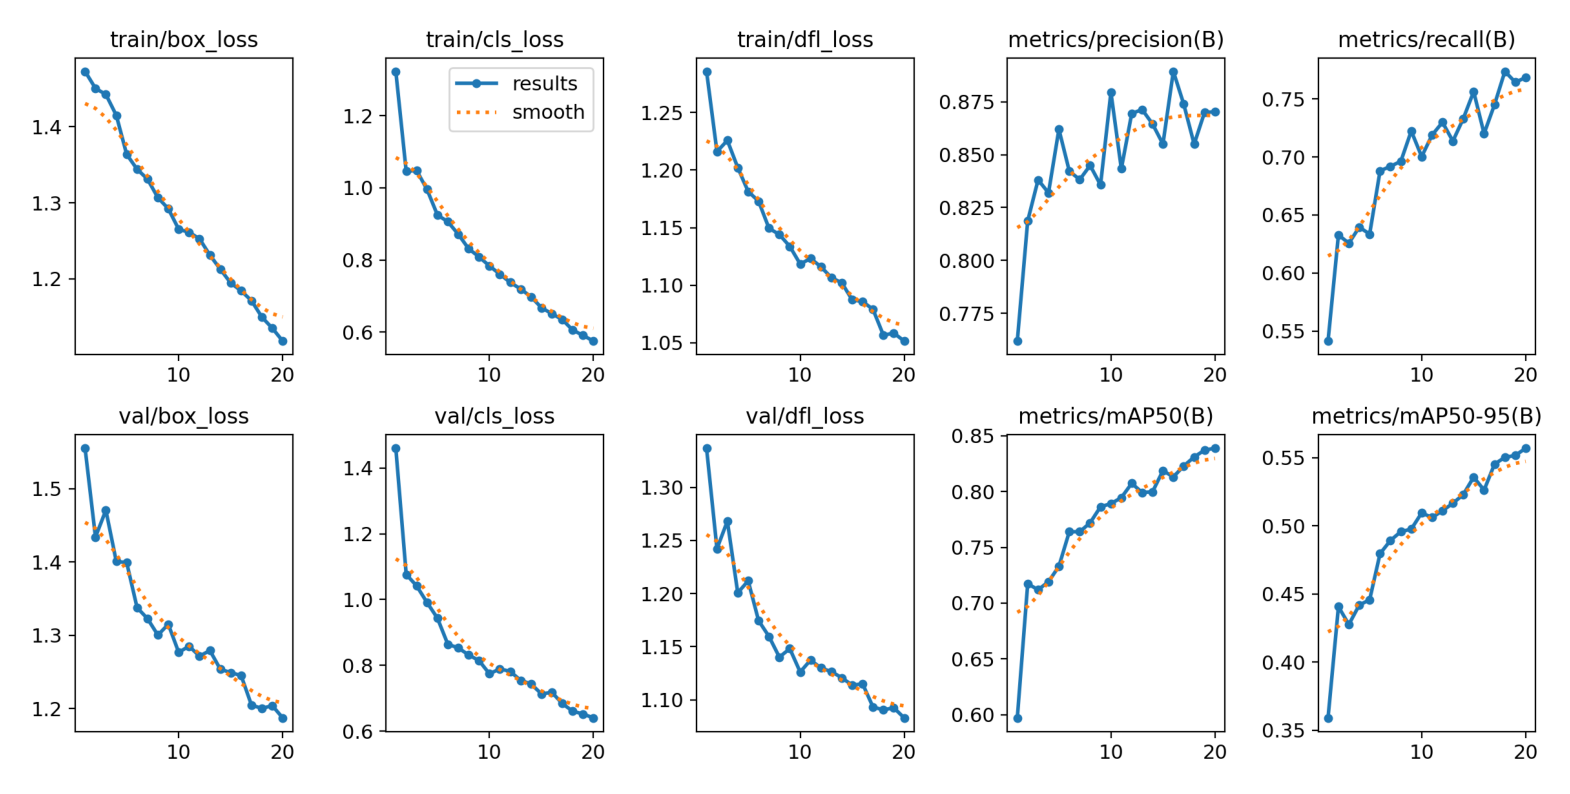

In [37]:
import matplotlib.image as mpimg

img = mpimg.imread('/kaggle/working/runs/detect/train4/results.png')
plt.figure(figsize=(20, 16))
plt.imshow(img)
plt.axis('off')  # Turn off axes for cleaner display
plt.show()